In [1]:
# %pip install xarray matplotlib scipy pandas

In [2]:
# import external packages
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo

# Spike Time Analysis with Pandas and Matplotlib


In the experiment reported by [Steinmetz et al, 2019 in Nature](https://www.nature.com/articles/s41586-019-1787-x), mice perform a discrimination task where they move the position of a stimulus using a steering wheel. During the experiment, electrophysiology recordings are made of different brain areas. The recordings are made with a dense array of probes called NeuroPixels.



##### Analysis Goals
In this notebook we will visualize spiking events, examine their relationship with key experimental variables, and compare activity patterns across distinct brain regions.
##### Learning Goals
We will once again use the [**Pandas**](https://pandas.pydata.org/) Python library to carry out numerical operations and plot results with the [**matplotlib**](https://matplotlib.org/)  plotting library.

---

### Practice with Pandas: Extracting information from a DataFrame

Each spike is characterised by 4 pieces of information:
* The identifier for that spike
* The trial in which the spike occurred
* The cell in which the spike occurred
* The time during the trial when the spike occurred


| Command                                    | Description                                                                                           |
|--------------------------------------------|-------------------------------------------------------------------------------------------------------|
| `df[df['column_B'] == 42]`                 | Filter a DataFrame where the values of `column_B` are 42.                                             |
| `df['column_A'].nunique()`                 | Count the number of unique values in `column_A` of a DataFrame.                                       |
| `df.groupby('column_B')['column_A'].nunique()` | Group a DataFrame according to values of `column_B` and count the number of unique values in `column_A`. |
| `df.max()`                                 | Find the maximum value of a DataFrame.                                                                |
| `df.idxmax()`                              | Find the index where the maximum value occurs in a DataFrame.                                         |
| `df.idxmin()`                              | Find the index where the minimum value occurs in a DataFrame.                                         |
| `plt.hist(data_values)`                    | Plot a histogram of `data_values` using Matplotlib.                                                   |



In [3]:
# Download the dataset

sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/3Uf2gScrvuTPQhB', 'data/steinmetz_2017-01-08_Muller.nc')

Create a `dataset` with `xr.load_dataset`

In [4]:
dataset = xr.load_dataset('data/steinmetz_2017-01-08_Muller.nc')
dataset

<xarray.Dataset>
Dimensions:             (trial: 261, time: 250, cell: 1268,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 5, spike_id: 1836009)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 256 257 258 259 260 261
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1264 1265 1266 1267 1268
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'CA1' 'DG' 'LP' 'PO' 'VISam'
  * spike_id            (spike_id) int32 1 2 3 4 ... 1836007 1836008 1836009
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 50 0 100 0 50 0 0 ... 0 100 0 100 0 100 0
    contrast_right      (trial) int8 0 50 25 100 50 50 ... 50 100 50 100 25 25
    gocue               (trial) float64 0.9828 0.902 1.114 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.272 1.104 1.402 1.053 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -27.6 ... 0.1221
    spike_time          (spike_id) float32 2.363 2.385 1.451 ... 1.651 0.5142
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1268 1268 1268 1268 1268
    spike_trial         (spike_id) uint32 1 1 2 2 2 2 ... 205 205 205 213 252
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

Make a DataFrame with spiking data (spike_time, spike_cell, spike_trial)

In [5]:
spike_cols = ['spike_time', 'spike_cell', 'spike_trial']
df = dataset[spike_cols].to_dataframe().reset_index()
df.head()

,spike_id,spike_time,spike_cell,spike_trial
0,1,2.362881,1,1
1,2,2.384915,1,1
2,3,1.450718,1,2
3,4,1.459585,1,2
4,5,1.963452,1,2


**Exercises**

**Example Exercise**

How many cells spiked during trial 1?

In [6]:
df[df['spike_trial'] == 1]['spike_cell'].nunique()

860

How many cells spiked during trial 24?

In [7]:
df[df['spike_trial'] == 24]['spike_cell'].nunique()

830

How many cells spiked during the last trial?

In [8]:
df[df['spike_trial'] == df['spike_trial'].max()]['spike_cell'].nunique()

963

Make a list of the number of spiking cells of each trial. **Hint** - use `df.groupby('spike_trial')`

Name the result `n_spiking_cells`

In [9]:
n_spiking_cells = df.groupby(by='spike_trial')['spike_cell'].nunique()

What was the maximum number of spiking cells?

In [10]:
n_spiking_cells.max()

1001

Which trial had the most spiking cells?

Name this trial `trial_num_with_most_spikes`

In [11]:
trial_num_with_most_spikes = n_spiking_cells[n_spiking_cells == n_spiking_cells.max()]
trial_num_with_most_spikes

n_spiking_cells.idxmax()

153

Use the trial number you found above to index the datafame `n_spiking_cells`. What is the result? 

In [12]:
n_spiking_cells[153]

1001

Find the trial number and the spike count where the least number of cells spiked

In [13]:
n_spiking_cells.idxmin(), n_spiking_cells.min()

(71, 758)

Let's visualize the distribution of the number of spiking cells with a matplotlib histogram. 

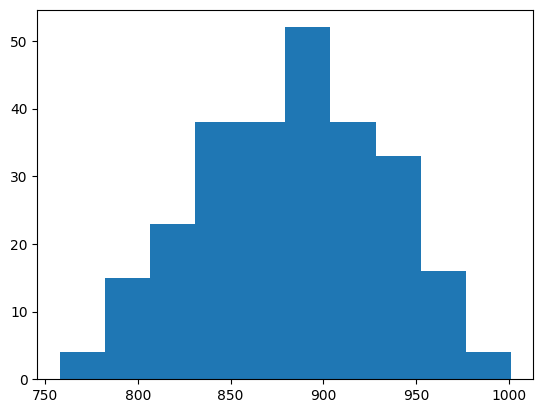

In [14]:
plt.hist(n_spiking_cells);

Make the same histogram as above but with steps

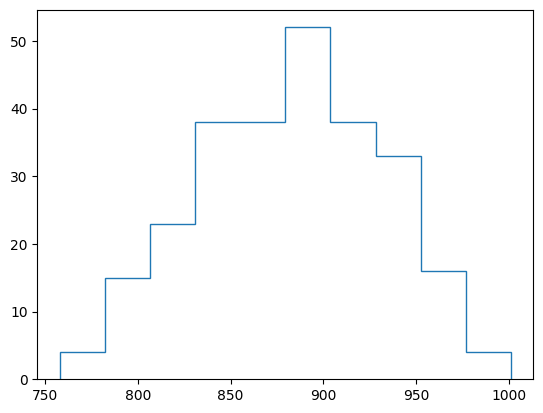

In [15]:
plt.hist(n_spiking_cells, histtype='step');


## Visualize the spiking activity using spike times



Now that we have the spike timing data, let's visualize them, and some of their properties, using matplotlib:

| Command                          | Description                                                        |
|----------------------------------|--------------------------------------------------------------------|
| `plt.scatter(x, y)`              | Create a scatter plot of `x` vs `y`. `x` and `y` are both 1D arrays. |
| `plt.xlabel("your_text")`        | Label the x-axis of the plot with specified text.                  |
| `plt.ylabel("your_text")`        | Label the y-axis of the plot with specified text.                  |
| `plt.title("your_text")`         | Add a title to the plot with the specified text.                   |



**Example Exercise**

Create a scatter plot to visualize spikes for a single neuron across multiple trials.

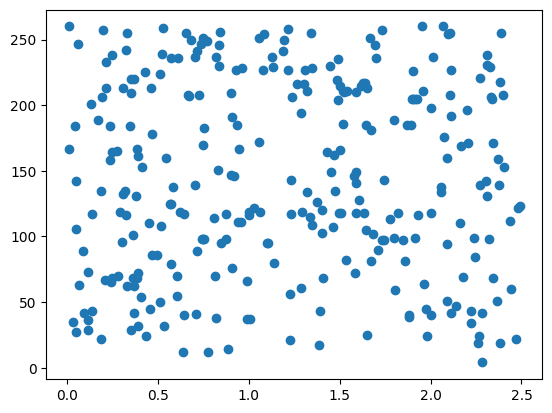

In [16]:
dd = df[df['spike_cell'] == 12]
plt.scatter(dd['spike_time'], dd['spike_trial'])

**Exercises**


Create a scatter plot to visualize spikes for a neuron number 11 across multiple trials.

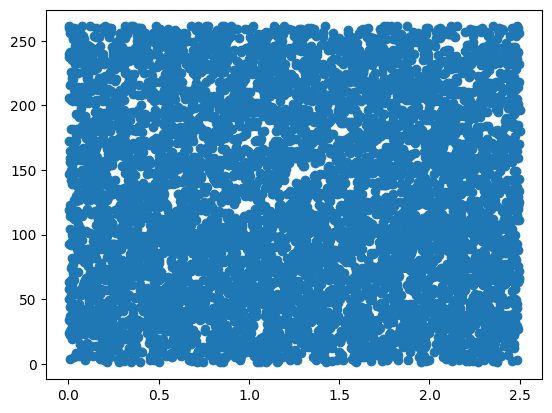

In [17]:
dd = df[df['spike_cell'] == 11]
plt.scatter(dd['spike_time'], dd['spike_trial'])

Wow, that plot looks crowded! Instead of a dot, plot with `|`. Use `plt.scatter?` to figure out how

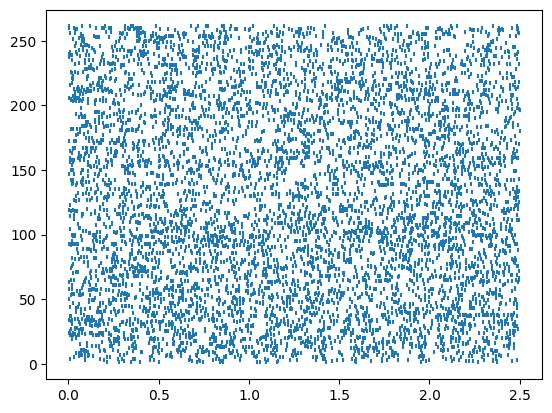

In [18]:
dd = df[df.spike_cell == 11]
plt.scatter(dd['spike_time'], dd['spike_trial'],marker='|', s=5 );

By default, matplotlib does not provide axis labels. 

Remake your plot with axis labels


Text(0, 0.5, 'trial number')

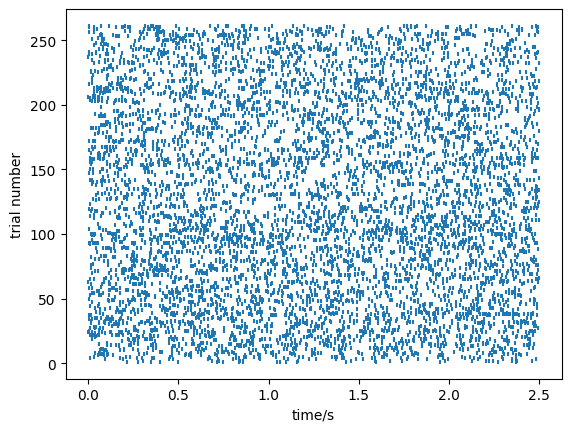

In [19]:
dd = df[df.spike_cell == 11]
plt.scatter(dd['spike_time'], dd['spike_trial'], marker='|', s=5 );
plt.xlabel('time/s')
plt.ylabel('trial number')


Create a scatter plot to visualize spikes for all neurons in trial 83.

Text(0, 0.5, 'cell')

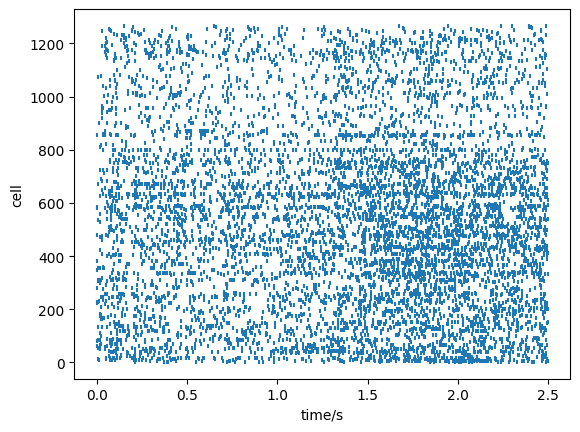

In [20]:
dd = df[df.spike_trial == 83]
plt.scatter(dd['spike_time'], dd['spike_cell'], marker='|', s=5 );
plt.xlabel('time/s')
plt.ylabel('cell')

We can vary the color of the points based of the spike time with the `c` argument of `plt.scatter`

Remake the above plot setting the color of the points to the spike time.

Text(0, 0.5, 'cell')

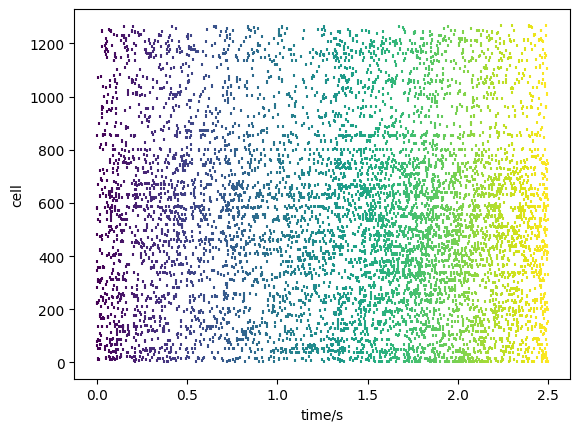

In [21]:
dd = df[df['spike_trial'] == 83]
plt.scatter(dd['spike_time'], dd['spike_cell'], marker='|', s=5, c=dd['spike_time'] );
plt.xlabel('time/s')
plt.ylabel('cell')

Remake the plot above, giving the plot an appropriate title 

Text(0.5, 1.0, 'Trial number 83')

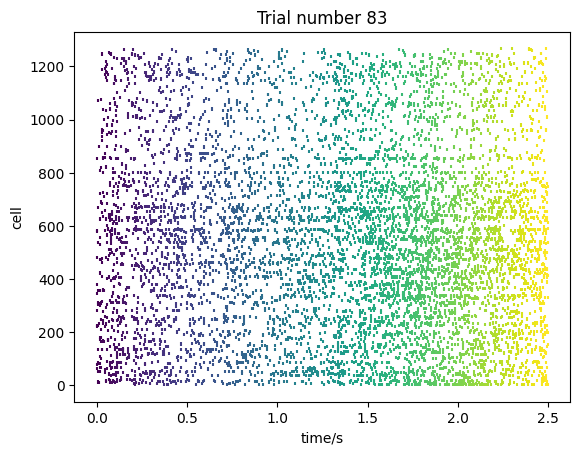

In [22]:
dd = df[df['spike_trial'] == 83]
plt.scatter(dd['spike_time'], dd['spike_cell'], marker='|', s=5, c=dd['spike_time'] );
plt.xlabel('time/s')
plt.ylabel('cell')
plt.title('Trial number 83')

---

## Relating spike timing to event-based variables

In this section, we will expand on the previous section and analyse spike time events joinly with other experimental events such as `response_time` or `feedback_time`.

| Command                                               | Description                                                                                     |
|-------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| `pd.merge(df_1, df_2)`                                | Merge `df_1` and `df_2` DataFrames based on common columns.                                     |
| `pd.merge(df_1, df_2, left_on='column_on_df_1', right_on='column_on_df_2')`                                | Merge `df_1` and `df_2` DataFrames based on `column_on_df_1` on `df_1` and `column_on_df_2` on `df_2`.                                     |
| `df.rename(columns={"old_column_name": "new_column_name"})` | Rename the "old_column_name" column to "new_column_name" in the DataFrame.                      |
| `df.sort_values(by="column_b")`                       | Sort the DataFrame based on the values in the "column_b" column in ascending order.             |
| `df['column_a'].factorize()[0]`                       | Encode the "column_a" column as an enumerated type, replacing each unique value with an integer. `[0]` returns just the array of integers. |


Create a DataFrame containing experimental events `response_time`, `feedback_time`, `gocue` and `active_trials`

In [23]:
cols = ["response_time", "feedback_time", "gocue", "active_trials"]
experimental_df = dataset[cols].to_dataframe().reset_index().rename(columns={"trial": "spike_trial"})
experimental_df

,spike_trial,response_time,feedback_time,gocue,active_trials
0,1,1.233257,1.271620,0.982816,True
1,2,1.066648,1.103617,0.902014,True
2,3,1.366633,1.402422,1.113618,True
3,4,1.016824,1.052817,0.688811,True
4,5,1.183435,1.193619,1.017616,True
...,...,...,...,...,...
256,257,NaN,NaN,NaN,False
257,258,NaN,NaN,NaN,False
258,259,NaN,NaN,NaN,False
259,260,NaN,NaN,NaN,False


**Example Exercise**



Merge the DataFrames `df` and `experimental_df` into one DataFrame

In [24]:
spike_time_df = pd.merge(df, experimental_df)
spike_time_df

,spike_id,spike_time,spike_cell,spike_trial,response_time,feedback_time,gocue,active_trials
0,1,2.362881,1,1,1.233257,1.27162,0.982816,True
1,2,2.384915,1,1,1.233257,1.27162,0.982816,True
2,168,0.575315,2,1,1.233257,1.27162,0.982816,True
3,169,0.637148,2,1,1.233257,1.27162,0.982816,True
4,170,1.113615,2,1,1.233257,1.27162,0.982816,True
...,...,...,...,...,...,...,...,...
1836004,1835388,1.273147,1265,261,NaN,NaN,NaN,False
1836005,1835888,0.502348,1266,261,NaN,NaN,NaN,False
1836006,1835889,0.835414,1266,261,NaN,NaN,NaN,False
1836007,1835890,0.914280,1266,261,NaN,NaN,NaN,False


**Exercises**

Create a merged dataframe of `df` and `experimental_df` but only where `active_trials` is `True`

Name the result `spike_time_df`

In [25]:
experimental_df_active = experimental_df[experimental_df['active_trials']==True]
spike_time_df = pd.merge(df, experimental_df_active )
spike_time_df

,spike_id,spike_time,spike_cell,spike_trial,response_time,feedback_time,gocue,active_trials
0,1,2.362881,1,1,1.233257,1.271620,0.982816,True
1,2,2.384915,1,1,1.233257,1.271620,0.982816,True
2,168,0.575315,2,1,1.233257,1.271620,0.982816,True
3,169,0.637148,2,1,1.233257,1.271620,0.982816,True
4,170,1.113615,2,1,1.233257,1.271620,0.982816,True
...,...,...,...,...,...,...,...,...
1048249,1833983,0.867644,1263,151,2.100698,2.111633,0.596409,True
1048250,1833984,1.736843,1263,151,2.100698,2.111633,0.596409,True
1048251,1833985,2.100776,1263,151,2.100698,2.111633,0.596409,True
1048252,1834971,2.304676,1265,151,2.100698,2.111633,0.596409,True


Make a scatter plot showing spike time events for a cell number 48 from `spike_time_df`

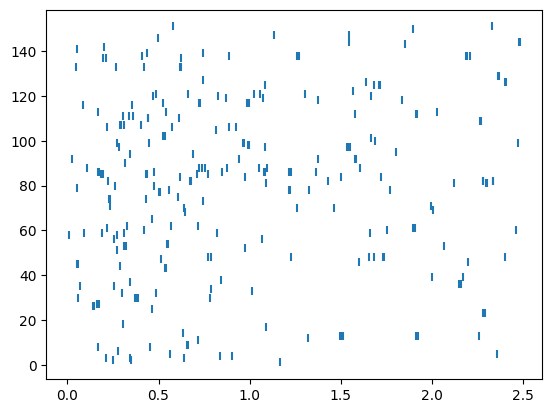

In [26]:
dd = spike_time_df[spike_time_df['spike_cell']==48]
plt.scatter(dd['spike_time'], dd['spike_trial'], marker='|')

Overplot the above plot with another scatter plot of the response times against spike trials

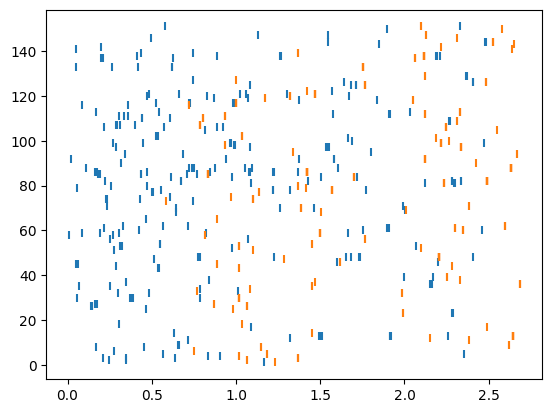

In [27]:
dd = spike_time_df[spike_time_df['spike_cell']==48]
plt.scatter(dd['spike_time'], dd['spike_trial'], marker='|')
plt.scatter(dd['response_time'], dd['spike_trial'], marker='|')

We can better assess the relation between the response event and neuron spiking by sorting the cells by response time.

First sort the spike data for cell 3 by response time. Call the result `spike_cell_48_df`

In [28]:
spike_cell_48_df = spike_time_df[spike_time_df['spike_cell']==48]
spike_cell_48_df = spike_cell_48_df.sort_values(by="response_time")
spike_cell_48_df

,spike_id,spike_time,spike_cell,spike_trial,response_time,feedback_time,gocue,active_trials
533775,99338,0.742227,48,73,0.585404,0.620010,0.500808,True
827442,99441,0.087679,48,116,0.718770,0.752412,0.623610,True
827443,99442,0.356179,48,116,0.718770,0.752412,0.623610,True
18407,99246,0.278203,48,6,0.750819,0.786012,0.618810,True
271641,99278,1.013364,48,33,0.767115,0.805213,0.672411,True
...,...,...,...,...,...,...,...,...
675969,99399,0.686661,48,94,2.667009,2.702443,1.155618,True
675968,99398,0.342161,48,94,2.667009,2.702443,1.155618,True
279120,99283,2.155156,48,36,2.683245,2.684843,1.171619,True
279121,99284,2.161123,48,36,2.683245,2.684843,1.171619,True


Now add a new column called `spike_trial_sorted` to `spike_cell_48_df` that is the `spike_trial` data reset to 0. **Hint** use `df.factorize()`

In [29]:
spike_cell_48_df ["spike_trial_sorted"] = spike_cell_48_df ['spike_trial'].factorize()[0]
spike_cell_48_df 

,spike_id,spike_time,spike_cell,spike_trial,response_time,feedback_time,gocue,active_trials,spike_trial_sorted
533775,99338,0.742227,48,73,0.585404,0.620010,0.500808,True,0
827442,99441,0.087679,48,116,0.718770,0.752412,0.623610,True,1
827443,99442,0.356179,48,116,0.718770,0.752412,0.623610,True,1
18407,99246,0.278203,48,6,0.750819,0.786012,0.618810,True,2
271641,99278,1.013364,48,33,0.767115,0.805213,0.672411,True,3
...,...,...,...,...,...,...,...,...,...
675969,99399,0.686661,48,94,2.667009,2.702443,1.155618,True,100
675968,99398,0.342161,48,94,2.667009,2.702443,1.155618,True,100
279120,99283,2.155156,48,36,2.683245,2.684843,1.171619,True,101
279121,99284,2.161123,48,36,2.683245,2.684843,1.171619,True,101


Make a scatter plot showing the spike and response times on the x axis and the `spike_trial_sorted` values on the y axis. This plot is known as a rasterplot.

Text(0.5, 0, 'time/s')

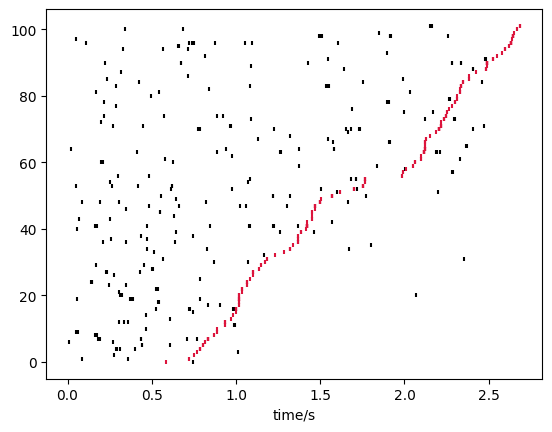

In [30]:

plt.scatter(spike_cell_48_df['spike_time'], spike_cell_48_df['spike_trial_sorted'], marker="|", s=10, c="k");
plt.scatter(spike_cell_48_df['response_time'], spike_cell_48_df['spike_trial_sorted'], marker="|", s=10, c="crimson");
plt.xlabel('time/s')


Cell 48 is clearly has a strong relationship to the subject's response. Can you think of why this may be? What brain region is cell 48 in?

**Hint** - use `dataset["brain_area"].to_dataframe().reset_index()`

In [31]:
dd=  dataset["brain_area"].to_dataframe().reset_index()
dd[dd['cell']==48]

,cell,brain_area
47,48,VISam


Make another rasterplot but for cell 187

Text(0.5, 0, 'time/s')

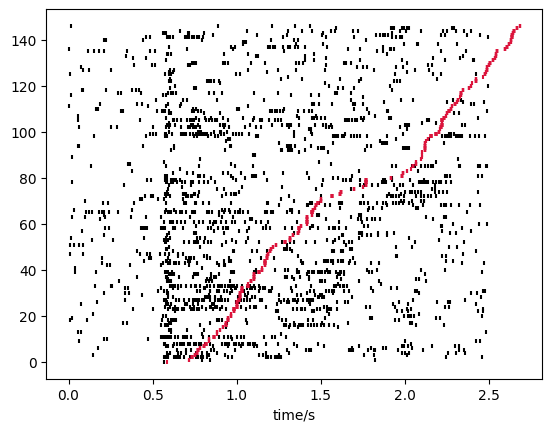

In [32]:
dd = spike_time_df[spike_time_df['spike_cell']==187]
dd = dd.sort_values(by="response_time")

dd["spike_trial_sorted"] = dd['spike_trial'].factorize()[0]

plt.scatter(dd['spike_time'], dd['spike_trial_sorted'], marker="|", s=10, c="k");
plt.scatter(dd['response_time'], dd['spike_trial_sorted'], marker="|", s=10, c="crimson");
plt.xlabel('time/s')


Text(0.5, 0, 'time/s')

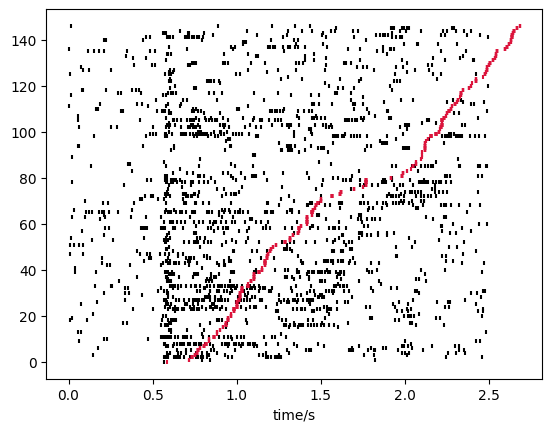

In [33]:
dd = spike_time_df[spike_time_df['spike_cell']==187]
dd = dd.sort_values(by="response_time")

dd["spike_trial_sorted"] = dd['spike_trial'].factorize()[0]

plt.scatter(dd['spike_time'], dd['spike_trial_sorted'], marker="|", s=10, c="k");
plt.scatter(dd['response_time'], dd['spike_trial_sorted'], marker="|", s=10, c="crimson");
#plt.scatter(dd['gocue'], dd['spike_trial_sorted'], marker="|", s=10, c="green");

plt.xlabel('time/s')

What do you notice about the above rasterplot? Do you think that anything special happens around 0.5s into each trial? **Hint** Look at the Attributes of the `dataset`

In [34]:
dataset

<xarray.Dataset>
Dimensions:             (trial: 261, time: 250, cell: 1268,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 5, spike_id: 1836009)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 256 257 258 259 260 261
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1264 1265 1266 1267 1268
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'CA1' 'DG' 'LP' 'PO' 'VISam'
  * spike_id            (spike_id) int32 1 2 3 4 ... 1836007 1836008 1836009
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 50 0 100 0 50 0 0 ... 0 100 0 100 0 100 0
    contrast_right      (trial) int8 0 50 25 100 50 50 ... 50 100 50 100 25 25
    gocue               (trial) float64 0.9828 0.902 1.114 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.272 1.104 1.402 1.053 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -27.6 ... 0.1221
    spike_time          (spike_id) float32 2.363 2.385 1.451 ... 1.651 0.5142
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1268 1268 1268 1268 1268
    spike_trial         (spike_id) uint32 1 1 2 2 2 2 ... 205 205 205 213 252
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

## Spiking activity in different brain areas

The dataset includes which brain areas each spiking cell is in. In this section we will use pandas and matplotlib to find the most active brain areas

Create a dataframe that contains the brain area and call it `brain_region_df`.


| Command                                               | Description                                                                                     |
|-------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| `pd.merge(df_1, df_2)`                                | Merge `df_1` and `df_2` DataFrames based on common columns.                                     |
| `pd.merge(df_1, df_2, left_on='column_on_df_1', right_on='column_on_df_2')`                                | Merge `df_1` and `df_2` DataFrames based on `column_on_df_1` on `df_1` and `column_on_df_2` on `df_2`.                                     |
| `df.rename(columns={"old_column_name": "new_column_name"})` | Rename the "old_column_name" column to "new_column_name" in the DataFrame.                      |
| `df.sort_values(by="column_b")`                       | Sort the DataFrame based on the values in the "column_b" column in ascending order.             |
| `df['column_a'].factorize()[0]`                       | Encode the "column_a" column as an enumerated type, replacing each unique value with an integer. `[0]` returns just the array of integers. |
|`df['col_A'].value_counts()`|counts and lists how many times each unique category appears in the `col_A`|


In [35]:
brain_region_df = dataset["brain_area"].to_dataframe().reset_index()
brain_region_df

,cell,brain_area
0,1,PO
1,2,PO
2,3,PO
3,4,VISam
4,5,PO
...,...,...
1263,1264,root
1264,1265,root
1265,1266,root
1266,1267,root


Create a DataFrame with information about spikes and brain areas by merging `brain_region_df` and `df`

In [36]:
spike_region_df = pd.merge(df, brain_region_df, left_on='spike_cell', right_on='cell')
spike_region_df

,spike_id,spike_time,spike_cell,spike_trial,cell,brain_area
0,1,2.362881,1,1,1,PO
1,2,2.384915,1,1,1,PO
2,3,1.450718,1,2,1,PO
3,4,1.459585,1,2,1,PO
4,5,1.963452,1,2,1,PO
...,...,...,...,...,...,...
1836004,1836005,2.240762,1268,205,1268,root
1836005,1836006,2.268195,1268,205,1268,root
1836006,1836007,2.401162,1268,205,1268,root
1836007,1836008,1.650607,1268,213,1268,root


**Example Exercise**


What brain areas were recorded from this specific mouse?

In [37]:
spike_region_df.brain_area.unique()

array(['PO', 'VISam', 'LP', 'DG', 'CA1', 'root'], dtype=object)

**Exercises**

How many spikes occur in  each brain area?

In [38]:
spike_region_df['brain_area'].value_counts()

brain_area
root     572279
PO       445466
VISam    313577
LP       301621
DG       124526
CA1       78540
Name: count, dtype: int64

We will take the spikes for trial 187 and produce an ordered index for brain area

**Example Exercise**

In [39]:
dd = spike_region_df[spike_region_df["spike_trial"] == 187]
dd = dd.sort_values(by="brain_area")
dd["ordered_index"] = dd.spike_cell.factorize()[0]
dd

,spike_id,spike_time,spike_cell,spike_trial,cell,brain_area,ordered_index
818501,818502,1.757417,470,187,470,CA1,0
273926,273927,0.079684,145,187,145,CA1,1
810864,810865,2.353217,465,187,465,CA1,2
810863,810864,2.342650,465,187,465,CA1,2
810862,810863,1.872784,465,187,465,CA1,2
...,...,...,...,...,...,...,...
1471034,1471035,1.581396,868,187,868,root,922
1472233,1472234,0.688164,869,187,869,root,920
1472234,1472235,1.073696,869,187,869,root,920
1426025,1426026,0.170764,828,187,828,root,824


Let's make a rasterplot for one brain area showing the `spike_time` on the x axis and `ordered_index` on the y axis

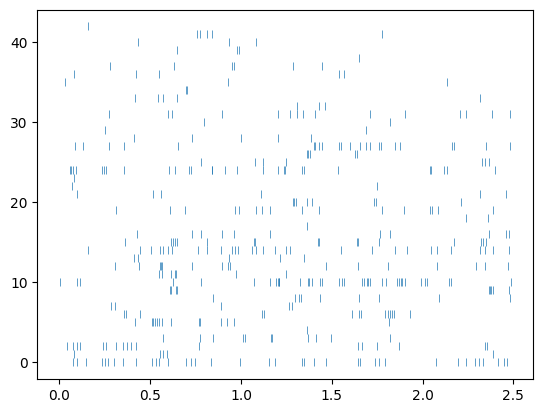

In [40]:
area = "CA1"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area['spike_time'], dd_area['ordered_index'],  marker='|', linewidths=0.5, label=area)

Which brain areas are in `dd`?

In [41]:
dd['brain_area'].unique()

array(['CA1', 'DG', 'LP', 'PO', 'VISam', 'root'], dtype=object)

For each brain area make a rasterplot on the same figure 

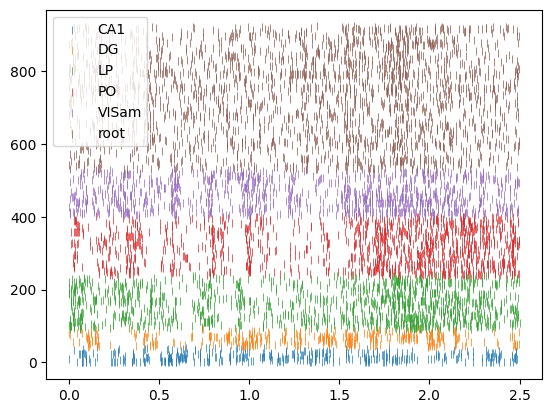

In [42]:
area = "CA1"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index,  marker='|', linewidths=0.5, label=area)

area = "DG"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "LP"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index , marker='|', linewidths=0.5, label=area)

area = "PO"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "VISam"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "root"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

plt.legend()

Let's make the same plot in seaborn

<Axes: xlabel='spike_time', ylabel='ordered_index'>

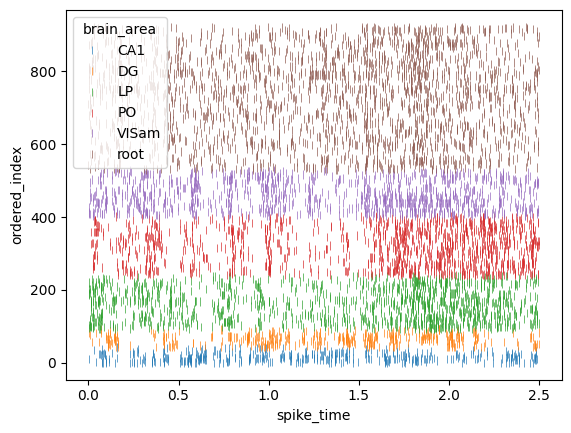

In [43]:
import seaborn as sns
sns.scatterplot(x=dd.spike_time, y=dd.ordered_index, marker="|", hue=dd.brain_area)
